<a href="https://colab.research.google.com/github/pavitraa0625/ML-LAB/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KeyboardInterrupt: 

In [3]:
import zipfile

zip_path = '/content/archive (1).zip'
out_dir = '/content/plantdisease'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(out_dir)

print("✅ Extracted to:", out_dir)


 Extracted to: /content/plantdisease


In [4]:
import os

# List class folders
folders = os.listdir(out_dir)
print(f"Found {len(folders)} folders:", folders[:5])  # show first 5


Found 2 folders: ['PlantVillage', 'plantvillage']


Total images found: 41276


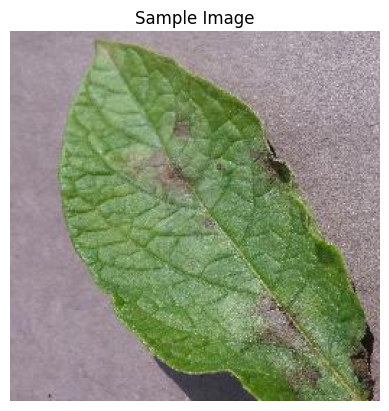

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Base directory
base_dir = '/content/plantdisease'

# Walk through all subdirectories and find image files
image_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

# Show how many images were found
print(f"Total images found: {len(image_paths)}")

# Show first image (if any)
if image_paths:
    img = mpimg.imread(image_paths[0])
    plt.imshow(img)
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()
else:
    print("No image files found.")


In [12]:
import os
import pandas as pd

# Base directory of your dataset
base_dir = '/content/plantdisease'

# Prepare image paths and labels
data = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(full_path))
            data.append((full_path, label))

# Create DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Save to Excel
excel_path = '/content/plant_disease_dataset.xlsx'
df.to_excel(excel_path, index=False)

print(f"Excel file saved at: {excel_path}")


Excel file saved at: /content/plant_disease_dataset.xlsx


In [13]:
from google.colab import files
files.download('/content/plant_disease_dataset.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import pandas as pd

df = pd.read_excel('/content/plant_disease_dataset.xlsx')
print(df.head())


                                          image_path                 label
0  /content/plantdisease/PlantVillage/Potato___La...  Potato___Late_blight
1  /content/plantdisease/PlantVillage/Potato___La...  Potato___Late_blight
2  /content/plantdisease/PlantVillage/Potato___La...  Potato___Late_blight
3  /content/plantdisease/PlantVillage/Potato___La...  Potato___Late_blight
4  /content/plantdisease/PlantVillage/Potato___La...  Potato___Late_blight


In [22]:
import cv2
import numpy as np

def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return np.zeros(256)  # in case image failed
    img = cv2.resize(img, (64, 64))
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # grayscale histogram
    return hist.flatten()

# Apply to all images
features = []
for path in df['image_path']:
    features.append(extract_features(path))

X = np.array(features)
y = df['label'].values

from collections import defaultdict

class_vectors = defaultdict(list)
for xi, label in zip(X, y):
    class_vectors[label].append(xi)

# Take any two classes
labels_used = list(class_vectors.keys())[:2]
vecs1 = np.array(class_vectors[labels_used[0]])
vecs2 = np.array(class_vectors[labels_used[1]])

# Centroids
mean1 = vecs1.mean(axis=0)
mean2 = vecs2.mean(axis=0)

# Spread (standard deviation)
std1 = vecs1.std(axis=0)
std2 = vecs2.std(axis=0)

# Distance between centroids
from numpy.linalg import norm
centroid_distance = norm(mean1 - mean2)

print("Centroid 1 Mean (Class 1):", mean1[:5])
print("Centroid 2 Mean (Class 2):", mean2[:5])
print("Spread Class 1:", std1[:5])
print("Spread Class 2:", std2[:5])
print("Distance between centroids:", centroid_distance)


Centroid 1 Mean (Class 1): [2.291 3.051 3.895 5.154 6.587]
Centroid 2 Mean (Class 2): [1.081081  1.3136392 1.6857322 2.2677562 2.9208045]
Spread Class 1: [3.920727  4.7994256 5.7506776 7.600264  9.43507  ]
Spread Class 2: [5.9271727 4.2999763 3.9546409 3.9986053 4.557631 ]
Distance between centroids: 142.7556


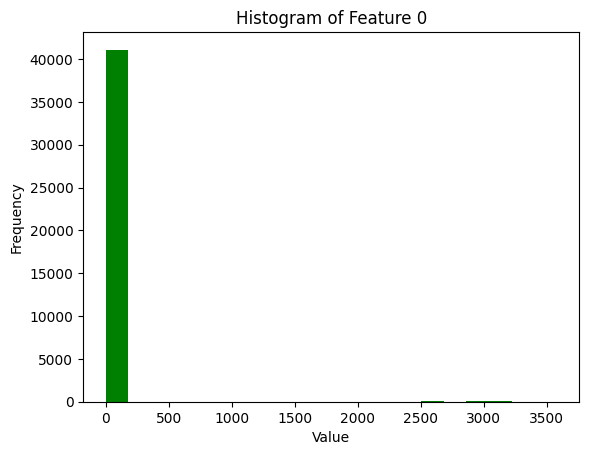

Mean: 16.317715
Variance: 32978.137


In [17]:
import matplotlib.pyplot as plt

# Pick one feature (e.g., the first bin of histogram)
feature_index = 0
feature_vals = X[:, feature_index]

# Histogram
plt.hist(feature_vals, bins=20, color='green')
plt.title("Histogram of Feature 0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Mean & Variance
mean_feat = np.mean(feature_vals)
var_feat = np.var(feature_vals)
print("Mean:", mean_feat)
print("Variance:", var_feat)


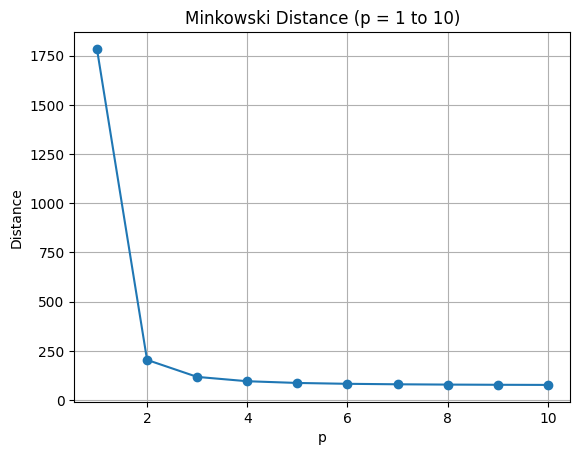

In [21]:
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt

vec1 = X[0]
vec2 = X[1]

# Minkowski distances for p from 1 to 10
mink_dists = [minkowski(vec1, vec2, p=p) for p in range(1, 11)]

# Plot the result
plt.plot(range(1, 11), mink_dists, marker='o')
plt.title("Minkowski Distance (p = 1 to 10)")
plt.xlabel("p")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


Accuracy: 0.6068804005491399


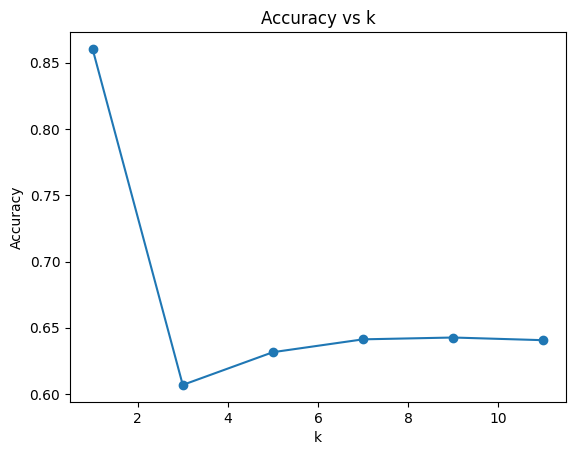

Confusion Matrix:
 [[ 402   20   15    9    4    0    5   31    2   22   30   16   36    0
     6]
 [  39  454   57   42   10   12   21   29   18  100   15   62   24    0
     4]
 [  13   52  422    4    1    0   13   21    7   17    5   37    3    0
     5]
 [  16   38   29  267    7   56   21   25   10   17   34   29   40    2
     9]
 [  10   10    6   18   18    0    1    0    0    8    1   15    0    0
     4]
 [   1   22    3   55    4  964   37   27    9   31    5   26   79    5
     8]
 [  34   48   42   49    1   25  193   36   14   10   18   24   78    4
    24]
 [  60   70   40   37    3   42   37  603   24   50   42   19   44   16
    58]
 [   7   24   29   15    3    6   12   38  258   53   32   20   46   21
     7]
 [  23   68   44   32    4   52   16   56   56  599   31   23   31   17
    11]
 [  27   23   12   27    5    1    7   17   39   13  643   88   41   25
    38]
 [  16   39   33   42   15   15   10   18   14   12   99  434   26    8
    61]
 [  45   54    8   69

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6: Accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# A7: Predict
y_pred = knn.predict(X_test)

# A8: Vary k
acc_list = []
for k in range(1, 12, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_list.append(acc)

plt.plot(range(1, 12, 2), acc_list, marker='o')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# A9: Confusion Matrix and Metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
